In [10]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime

In [11]:
import sys
import os 
sys.path.insert(0, os.path.abspath('../packages'))
import steps, functions, optimizers

In [12]:
step = steps.GoldenSectionStep(da = 0.01, tol = 1e-8, check_direction=True, normalize=False)

In [13]:
optimizrs = [
    ('Univariant', optimizers.UnivariantOptimizer(tol=1e-5)),
    ('Powell', optimizers.PowellOptimizer(tol=1e-5)),
    ('Steepest', optimizers.SteepestDescentOptimizer(tol=1e-5)),
    ('FletchRvs', optimizers.FletcherReevesOptimizer(tol=1e-5)),
    ('NewtnRaph', optimizers.NewtonRaphsonOptimizer(tol=1e-5)),
    ('BFGS', optimizers.BFGSOptimizer(tol=1e-5)),
]

In [14]:
def f(x1, x2):

    return x1**2 - 3*x1*x2 + 4*x2**2 + x1 - x2

def gradf(x1, x2):

    return np.array(
        [ 2*x1 - 3*x2 + 1, 
        -3*x1 + 8*x2 - 1]
    )

def hessf(x1, x2):

    return np.array(
        [
        [ 2, -3],
        [-3,  8]
        ]
    )

#f = functions.NumericalSpecialFunction(f)
f = functions.AnalyticalSpecialFunction(f, gradf, hessf)

points = [
    (np.array([2, 2]), 'r'),
    (np.array([-1, -3]), 'b'),
]

Univariant: p_final = [-0.714275, -0.142853, -0.285714].T. Execução:0:00:00.018073, 46 iterações
Univariant: p_final = [-0.714293, -0.142860, -0.285714].T. Execução:0:00:00.014857, 48 iterações
Powell: p_final = [-0.714286, -0.142857, -0.285714].T. Execução:0:00:00.029719, 6 iterações
Powell: p_final = [-0.714286, -0.142857, -0.285714].T. Execução:0:00:00.008199, 6 iterações
Steepest: p_final = [-0.714280, -0.142855, -0.285714].T. Execução:0:00:00.012854, 32 iterações
Steepest: p_final = [-0.714294, -0.142861, -0.285714].T. Execução:0:00:00.004116, 7 iterações
FletchRvs: p_final = [-0.714286, -0.142857, -0.285714].T. Execução:0:00:00.001178, 2 iterações
FletchRvs: p_final = [-0.714286, -0.142858, -0.285714].T. Execução:0:00:00.001748, 2 iterações
NewtnRaph: p_final = [-0.714286, -0.142857, -0.285714].T. Execução:0:00:00.000991, 1 iterações
NewtnRaph: p_final = [-0.714286, -0.142857, -0.285714].T. Execução:0:00:00.000881, 1 iterações
BFGS: p_final = [-0.714286, -0.142857, -0.285714].T. 

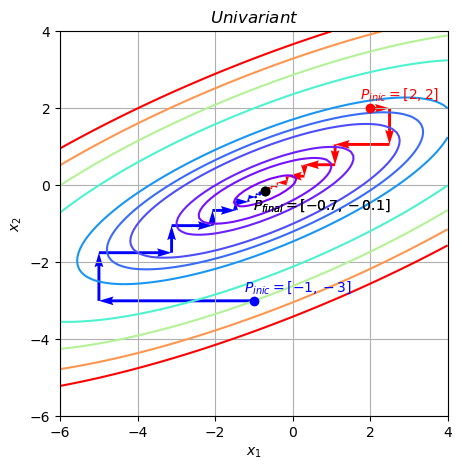

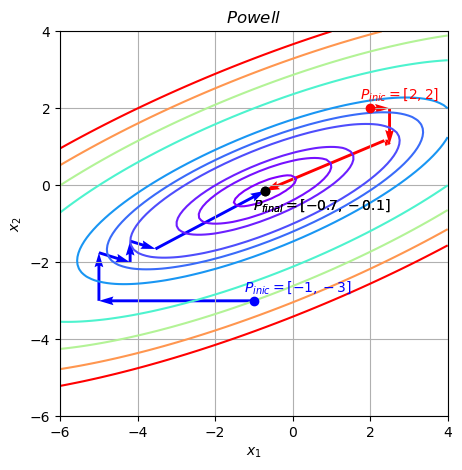

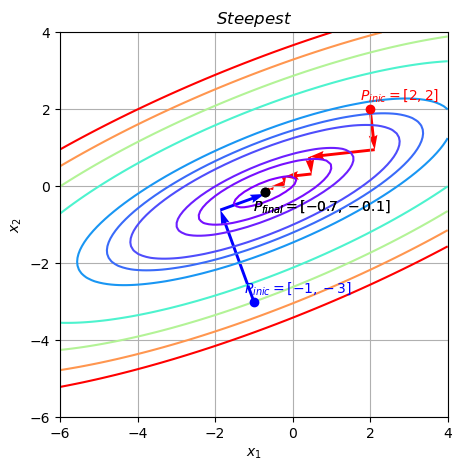

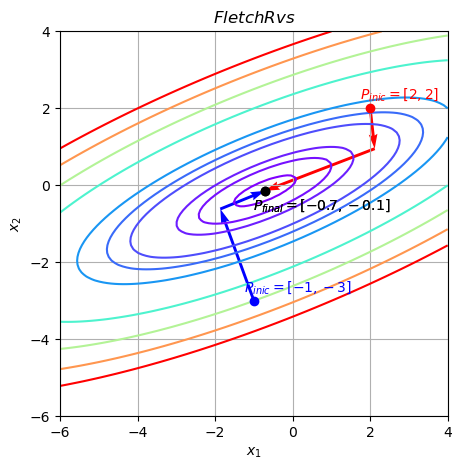

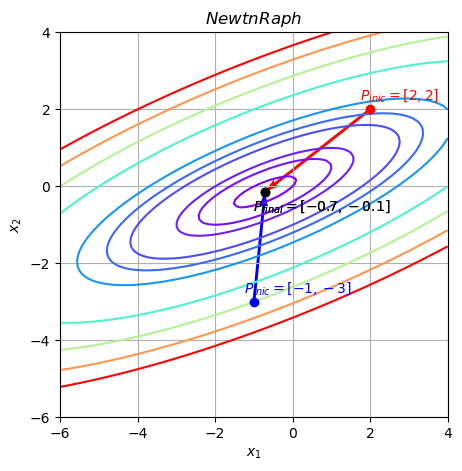

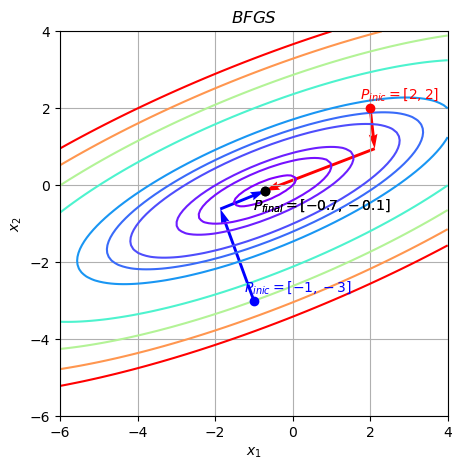

In [19]:
item = 'a'

x = np.linspace(-6, 4, 100)
y = np.linspace(-6, 4, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

levels =[0, 1, 2, 5, 7, 10, 20, 30, 40, 50]

for name, optimizer in optimizrs:
    fig, ax = plt.subplots(1,1, figsize=(5, 5))
    ax.contour(X, Y, Z, levels,cmap='rainbow')
    for p_inicial, color in points:
        t_init = datetime.datetime.now()
        p_final = optimizer(f, p_inicial, step)
        t_final = datetime.datetime.now()
        print(f'{name}: p_final = [{p_final[0]:.6f}, {p_final[1]:.6f}, {f(*p_final):.6f}].T. Execução:{t_final - t_init}, {optimizer.iter} iterações')
        ax.plot(*p_inicial, f'{color}o')
        ax.text(p_inicial[0]-0.25, p_inicial[1]+0.25, f'$P_{{inic}} = [{p_inicial[0]}, {p_inicial[1]}]$', color=color)
        ax.plot(*p_final, 'ko')
        ax.text(p_final[0]-0.3, p_final[1]-0.5, f'$P_{{final}} = [{p_final[0]:.1f}, {p_final[1]:.1f}]$', color='k')
        cache = optimizer.get_history()
        for i in range(len(cache)-1):
            p_i = cache[i]
            p_f = cache[i+1]
            ax.quiver(p_i[0], p_i[1], p_f[0]-p_i[0], p_f[1]-p_i[1], color=color, angles='xy', scale_units='xy', scale=1)#, label='Passo completo')
    ax.grid()
    #ax.legend()
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_title(f'${name}$')
    fig.savefig(f'images/q1{item}_{name}.pdf')

In [7]:
a = 10
b = 1

def f(x1, x2):

    return (1 + a - b*x1 - b*x2)**2 + (b + x1 + a*x2 - b*x1*x2)**2

def gradf(x1, x2):

    return np.array(
        [ 2*x1 - 3*x2 + 1, 
        -3*x1 + 8*x2 - 1]
    )

def hessf(x1, x2):

    return np.array(
        [
        [ 2, -3],
        [-3,  8]
        ]
    )

f = functions.NumericalSpecialFunction(f)
#f = functions.AnalyticalSpecialFunction(f, gradf, hessf)

points = [
    (np.array([10, 2]), 'r'),
    (np.array([-2, -3]), 'b'),
]

Univariant: p_final = [13.000001, 3.999999, 40.000000].T. Execução:0:00:00.088453, 65 iterações
Univariant: p_final = [7.000001, -2.000001, 40.000000].T. Execução:0:00:00.083488, 61 iterações
Powell: p_final = [13.000001, 4.000000, 40.000000].T. Execução:0:00:00.026815, 15 iterações
Powell: p_final = [7.000000, -2.000000, 40.000000].T. Execução:0:00:00.058139, 18 iterações
Steepest: p_final = [13.000000, 4.000000, 40.000000].T. Execução:0:00:00.060874, 48 iterações
Steepest: p_final = [7.000001, -2.000001, 40.000000].T. Execução:0:00:00.057398, 43 iterações
FletchRvs: p_final = [12.999999, 4.000001, 40.000000].T. Execução:0:00:00.094333, 80 iterações
FletchRvs: p_final = [7.000000, -2.000000, 40.000000].T. Execução:0:00:00.031166, 25 iterações
NewtnRaph: p_final = [10.000000, 1.000000, 121.000000].T. Execução:0:00:00.005499, 1 iterações
NewtnRaph: p_final = [7.000000, -2.000000, 40.000000].T. Execução:0:00:00.022324, 6 iterações
BFGS: p_final = [13.000000, 4.000000, 40.000000].T. Execu

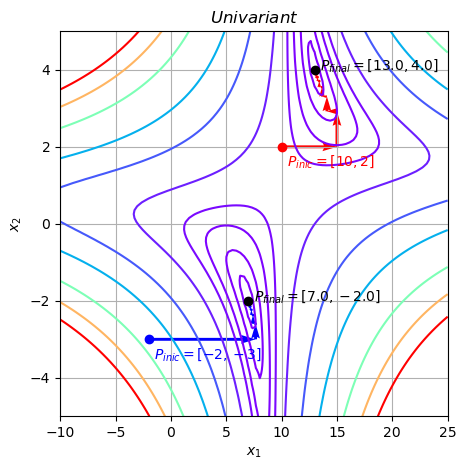

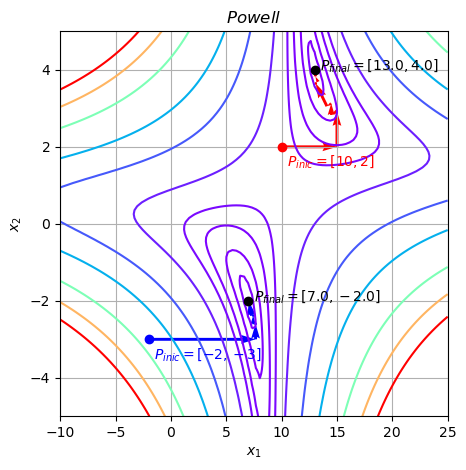

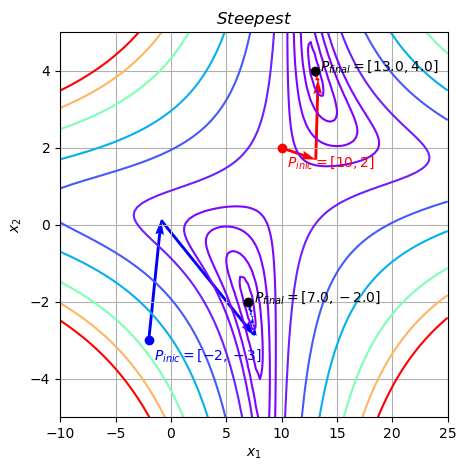

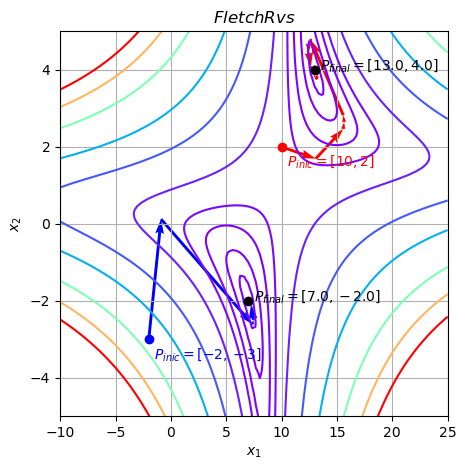

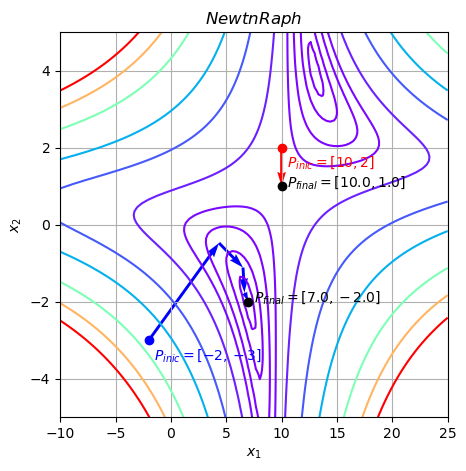

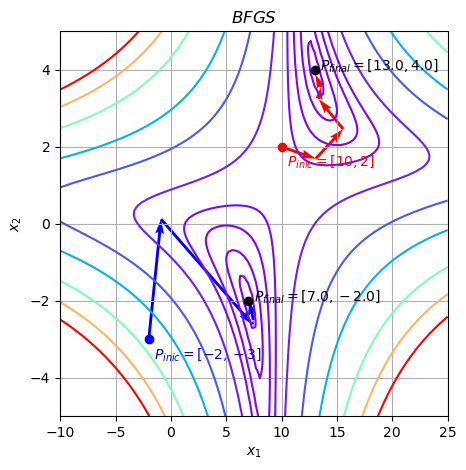

In [9]:
item = 'b'

x = np.linspace(-10, 25, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

levels = [40, 42, 50, 70, 100, 200, 500, 1000, 2000, 3000, 4000]


for name, optimizer in optimizrs:
    fig, ax = plt.subplots(1,1, figsize=(5, 5))
    ax.contour(X, Y, Z, levels,cmap='rainbow')
    for p_inicial, color in points:
        t_init = datetime.datetime.now()
        p_final = optimizer(f, p_inicial, step)
        t_final = datetime.datetime.now()
        print(f'{name}: p_final = [{p_final[0]:.6f}, {p_final[1]:.6f}, {f(*p_final):.6f}].T. Execução:{t_final - t_init}, {optimizer.iter} iterações')
        ax.plot(*p_inicial, f'{color}o')
        ax.text(p_inicial[0]+0.5, p_inicial[1]-0.5, f'$P_{{inic}} = [{p_inicial[0]}, {p_inicial[1]}]$', color=color)
        ax.plot(*p_final, 'ko')
        ax.text(p_final[0]+0.5, p_final[1]+0.0, f'$P_{{final}} = [{p_final[0]:.1f}, {p_final[1]:.1f}]$', color='k')
        cache = optimizer.get_history()
        for i in range(len(cache)-1):
            p_i = cache[i]
            p_f = cache[i+1]
            ax.quiver(p_i[0], p_i[1], p_f[0]-p_i[0], p_f[1]-p_i[1], color=color, angles='xy', scale_units='xy', scale=1)#, label='Passo completo')
    ax.grid()
    #ax.legend()
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_title(f'${name}$')
    fig.savefig(f'images/q1{item}_{name}.pdf')